<a href="https://colab.research.google.com/github/likitha-4821/CreditCardDetection/blob/main/CreditCardDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [3]:
data = pd.read_csv("creditcard.csv")

In [4]:
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [5]:
print(data.shape)
print(data.describe())

(188261, 31)
                Time             V1             V2             V3  \
count  188261.000000  188261.000000  188261.000000  188261.000000   
mean    66911.456133      -0.126822       0.014291       0.382492   
std     32193.455193       1.880580       1.617636       1.428443   
min         0.000000     -56.407510     -72.715728     -33.680984   
25%     43063.000000      -0.969960      -0.568821      -0.232844   
50%     64747.000000      -0.121054       0.088501       0.542372   
75%     84168.000000       1.202527       0.788329       1.252559   
max    127894.000000       2.439207      22.057729       9.382558   

                  V4             V5             V6             V7  \
count  188261.000000  188261.000000  188261.000000  188261.000000   
mean        0.088906      -0.135514       0.051997      -0.062135   
std         1.390410       1.356318       1.306515       1.212057   
min        -5.683171     -42.147898     -26.160506     -43.557242   
25%        -0.777499

In [6]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))


0.001958571945585762
Fraud Cases: 368
Valid Transactions: 187892


In [9]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


,Amount
count,368.000000
mean,115.659891
std,248.444604
min,0.000000
25%,1.000000
50%,11.395000
75%,104.007500
max,2125.870000


In [12]:
print(" details of valid transaction")
valid.Amount.describe()

 details of valid transaction


,Amount
count,187892.000000
mean,88.949661
std,247.532742
min,0.000000
25%,5.960000
50%,22.750000
75%,79.000000
max,19656.530000


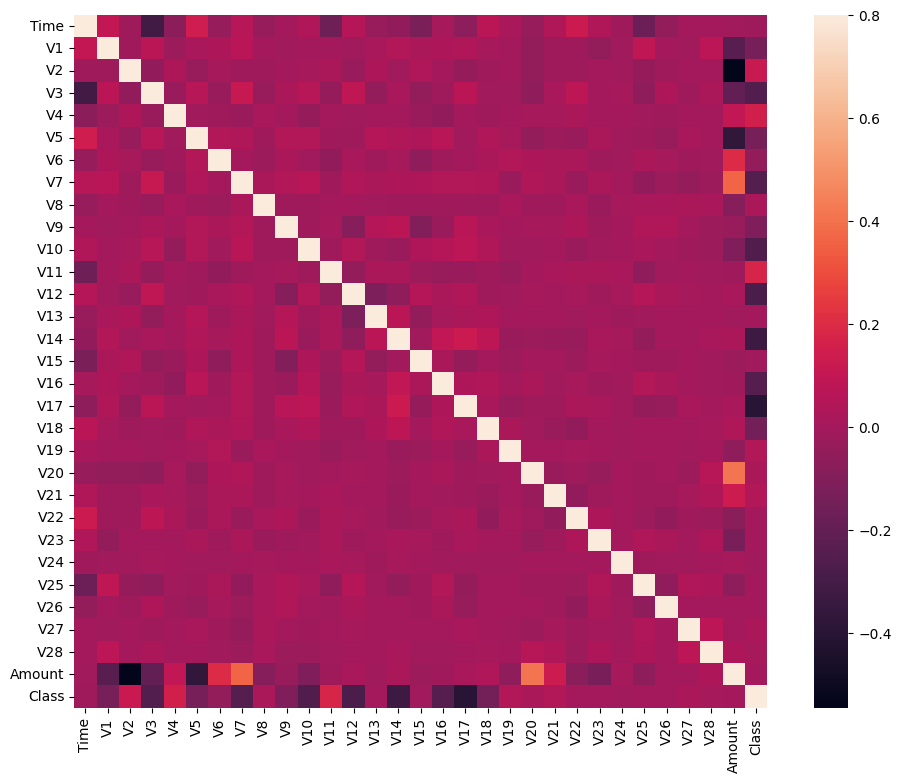

In [13]:
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()


In [14]:
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing
# (its a numpy array with no columns)
xData = X.values
yData = Y.values

(188261, 30)
(188261,)


In [17]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# Create an imputer to replace NaN values with the most frequent value
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer to your training data and transform it
yTrain = imputer.fit_transform(yTrain.reshape(-1, 1))

# Reshape yTrain back to its original shape
yTrain = yTrain.ravel()

# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)
# predictions
yPred = rfc.predict(xTest)


In [27]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Random Forest classifier")

acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))

rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))


The model used is Random Forest classifier
The accuracy is 0.9994157172071283
The precision is 0.9454545454545454
The recall is 0.7323943661971831
The F1-Score is 0.8253968253968254
The Matthews correlation coefficient is0.8318653971696748


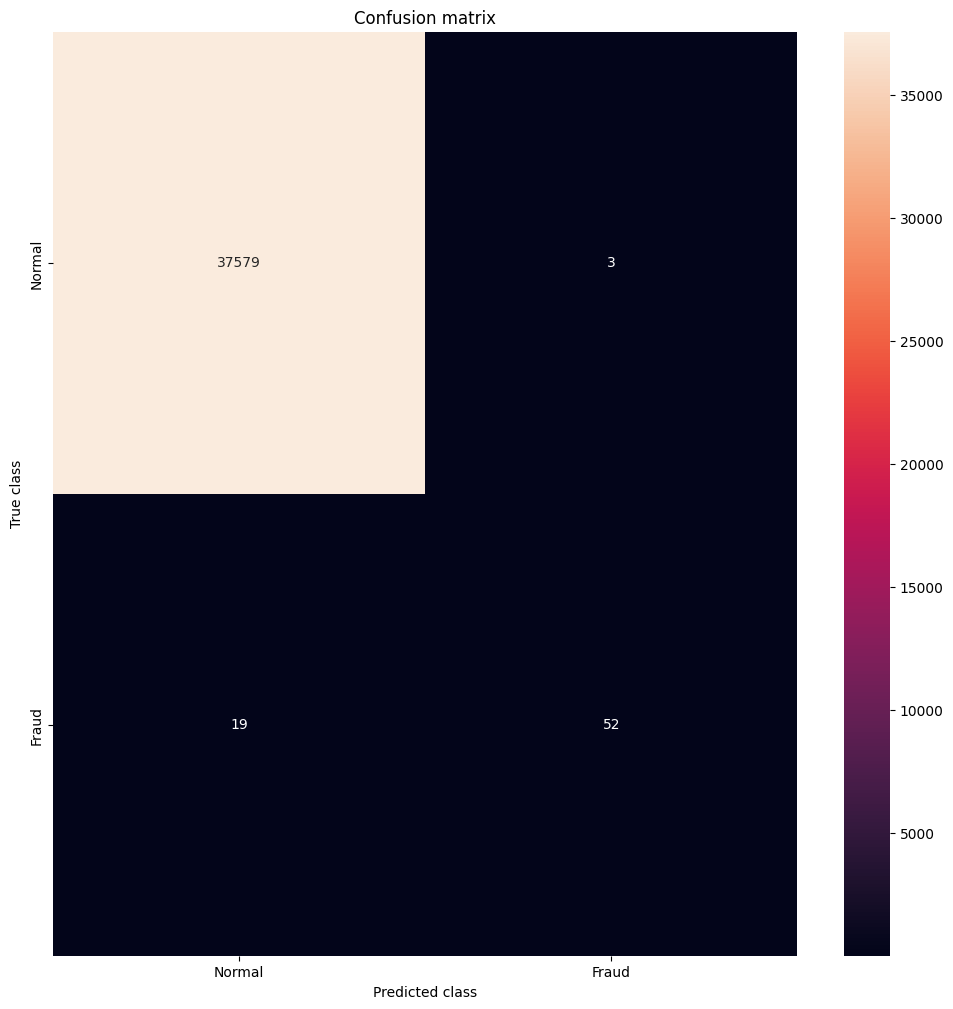

In [28]:
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
